
# Classification on Wisconsin Breast Cancer data (with Python)


In this notebook, we will explore some of the basic capabilities of Python's **scikit-learn** package for the data science's role to work with classification datasets. For numerical analysis of tabular data, we shall use the Pandas package, which includes specific data types and functions for working with two-dimensional tables of data in Python. The Pandas package offers a more convenient structure to work with data - the DataFrame.

*Supervised* machine learning techniques involve in training a machine learning model that utilizes a set of *features* to predict a *label* using a dataset that includes already-known label values. This can be mathematically formulated as
$$y = f([x_1, x_2, x_3, ...]),$$
where $f$ represents a function that maps the features to the label.

*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** = $[x_1, x_2, x_3, ...]$ values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Risk" or "No-risk"; "Profitable" or "Non-Profitable"; and so on.

In this Lab, we shall use the Breast Cancer Wisconsin (Diagnostic) Dataset, extracted from [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The goal of this dataset is to predict whether the cancer of patient is benign or malignant. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image and the 3-dimensional space that it occupies (K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34).

Contents:
- Explore and preprocess data
- Split data into training data and test data
- Train classification models using **scikit-learn** machine learning models
- Save your model and inference new cases.
- Appendix 1: Other file formats

What you will learn:
- Exploring and preprocessing data for training classification machine learning models.
- Explore the different off-the-shelf classification machine learning models of **scikit-learn**.
- Save the trained machine learning model and import it to make new predictions.


Source:
- [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html)
- [User guide of Scikit-learn](https://scikit-learn.org/stable/user_guide.html)

## Explore and preprocess data

Let us import the Breast Cancer Wisconsin Dataset. The dataset is saved in the folder *online-data* in *csv-format*. This is a common data format where the information is delimited using a symbol such as **,** or **;**.

To import this data as a Pandas DataFrame into the memory of Python, the **read_csv** method can be used from the Pandas package. In this method, you need to provide which **delimiter** that is used in the dataset and whether a **header** is present. The header can contain schema information about what the numbers of the data represents. More information on Pandas DataFrame can be found in the [Pandas documentation](https://pandas.pydata.org/docs/).

Remark:
- To import data from other file formats, please look into Appendix 1.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wisconsin_data.csv', delimiter=',', header='infer')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**- Questions :**

 - What are the number of samples and the number of features of your data?

- What do the two first columns represent?

- What is the distribution of the classes in this dataset?





In [ ]:
### Answers ....
1- num of samples:569, num of features:33
2- id of patient and whether it's banign or malignant
3- To determine the class distribution, we need to count the occurrences of M and B in the diagnosis
column. You can use the following command:



In [2]:
print(data['diagnosis'].value_counts())


diagnosis
B    357
M    212
Name: count, dtype: int64


Ten real-valued features are computed for each cell nucleus:
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1).

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the *features* and the *label* your model will try to predict. This may require some work
- to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values),
- deriving new feature columns by transforming or combining existing features (a process known as *feature engineering*),
- *normalizing* numeric features (values you can measure or count) so they're on a similar scale,
- and *encoding* categorical features (values that represent discrete categories) as numeric indicators.

For example, we observe that the last column of the dataset contains missing values from a mistake when importing the data. Also, the patient *id* cannot possibly predict the diagnosis label. Therefore, we will remove the first and last column using the following code cell. This can be done by using the **iloc** method.

In [3]:
# Remove the first and last column

# Remove the first and last column
data2 = data.iloc[:, 1:-1]

# Display the first few rows to verify the changes
data2.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can visualize the distribution of the features of the dataset using a boxplot, sorted by each value of the label. Let us do this only for the mean values of the features,

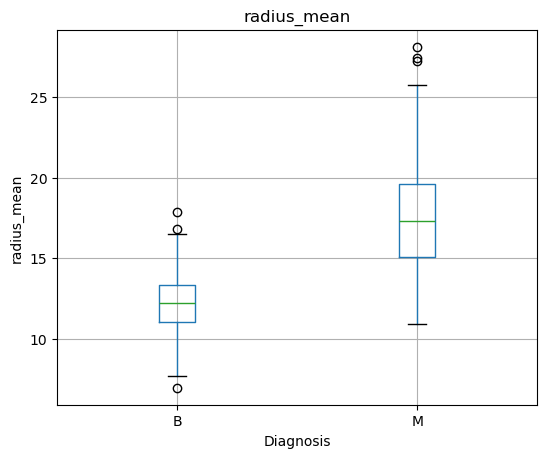

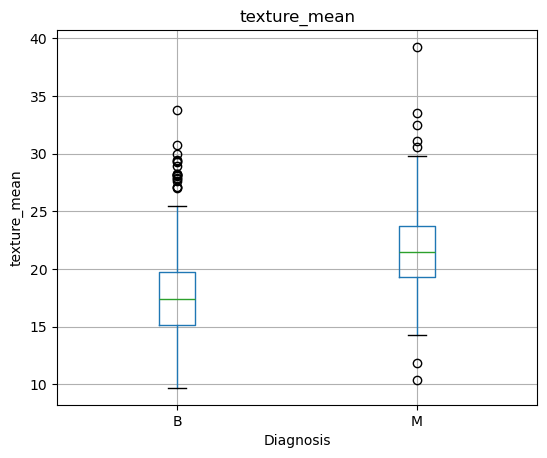

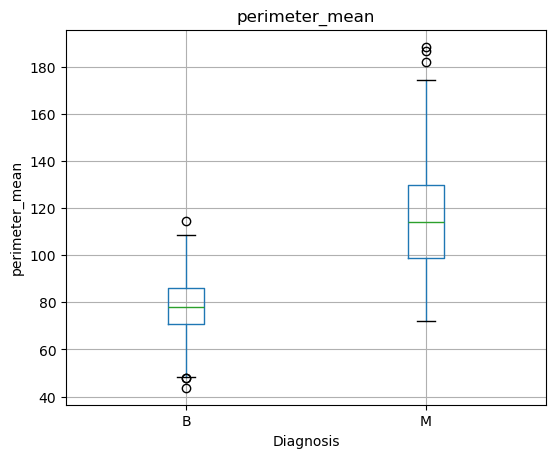

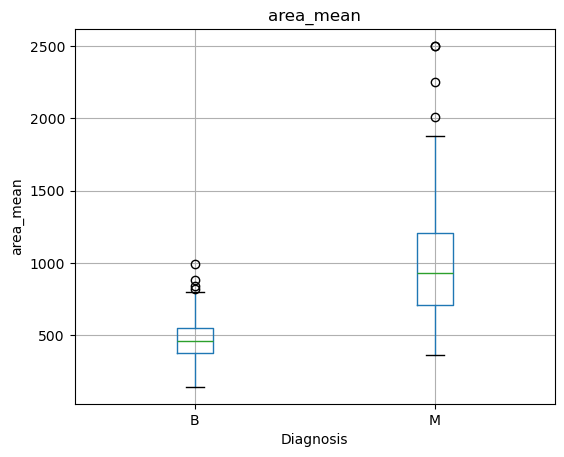

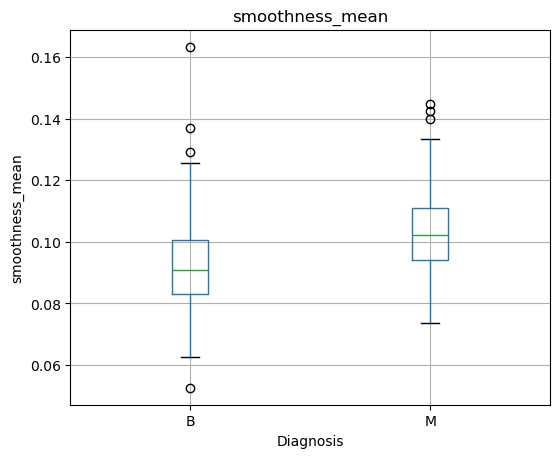

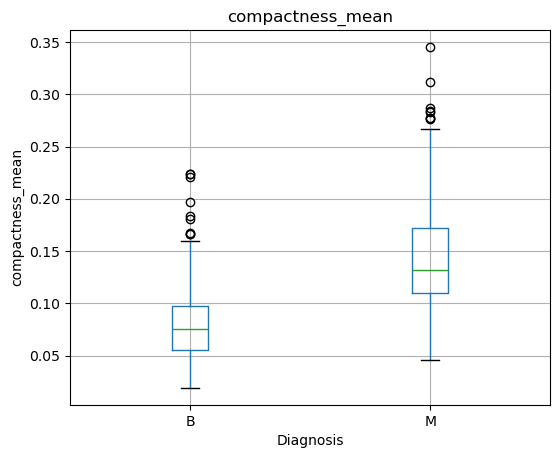

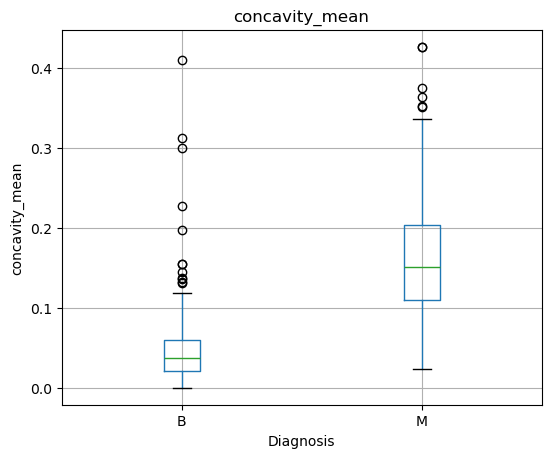

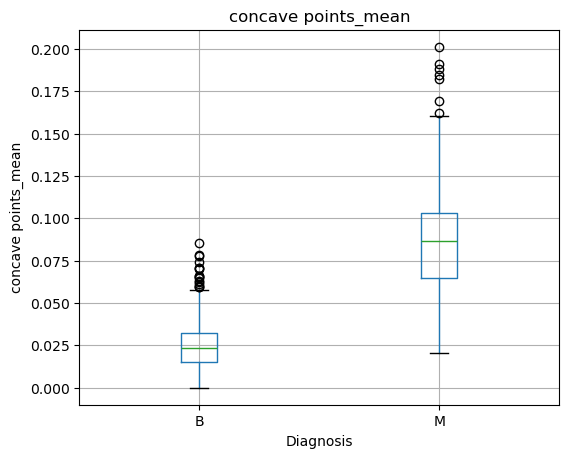

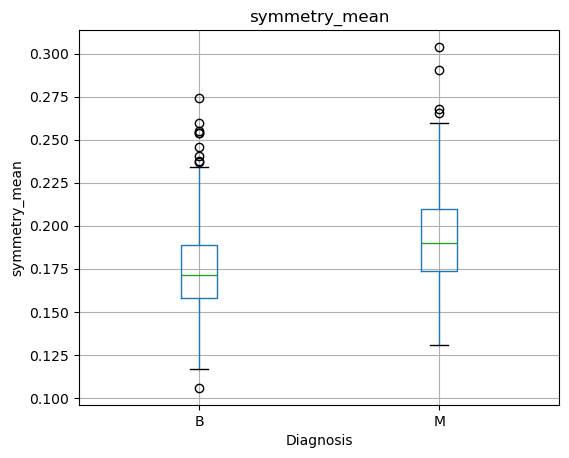

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

# Defining the mean-related features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
            'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
            'symmetry_mean']

# Visualizing with boxplots sorted by the diagnosis label
for col in features:
    data2.boxplot(column=col, by='diagnosis', figsize=(6,5))
    plt.title(col)
    plt.suptitle('')  # Remove automatic suptitle
    plt.xlabel('Diagnosis')
    plt.ylabel(col)

plt.show()


**Question :**

-- What is your observation about these features distribution and what can you conclude about it?

-- **Answer** : ..... !!!

Radius Mean is a Strong Indicator: The difference in distributions between malignant and benign tumors suggests that radius_mean is an important predictive feature for diagnosing breast cancer.
Larger Tumors Are More Likely Malignant: Higher values of radius_mean are strongly associated with malignant cases.
Potential for Classification Models: This confirms that radius_mean could be used as a key feature in a classification model to differentiate between benign and malignant tumors.


This analysis can also be repeated for the ommited features of the dataset.

## Split data into training data and test data

Let us now do prepare the dataset for training a machine learning model. We can split the dataset into a dataset with the features ***X*** and the label label ***y***, by locating their column numbers.

In [5]:
# Split by features and label

# Separate features (X) and labels (y)
X = data2.drop(columns=['diagnosis'])  # Features
y = data2['diagnosis']  # Labels

# Check the results for the first 4 patients
for i in range(0, 4):
    print("Patient", str(i+1), "\n  Features:", list(X.iloc[i]), "\n  Label:", y.iloc[i], "\n")

Patient 1 
  Features: [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189] 
  Label: M 

Patient 2 
  Features: [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902] 
  Label: M 

Patient 3 
  Features: [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758] 
  Label: M 

Patient 4 
  Features: [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 

In machine learning, we construct a training dataset and a test dataset. The training dataset is, as the name suggests, for optimizing the untrained machine learning model into a machine learning model that recognizes the underlying relations and patterns of the dataset. The model is said to be *fitted* to the dataset. However, to evaluate the performance of the trained model, we measure its performance on a separate dataset, the test dataset.

*It is important to know that if the data is not split properly, it can introduce a form of **sampling bias**. For example, if data is split randomly without considering the distribution of classes in a classification problem, it could lead to overrepresentation of certain classes in the training set and underrepresentation in the test set. This is often addressed by using **stratified splitting**, where the train-test split is done in a way that preserves the same proportions of classes as in the original dataset*


In the python **scikit-learn** package, we can use a **train_test_split** method that ensures we get a statistically random split of training and test data.


While using different ways for splitting the data could potentially help mitigate sampling bias, it’s also important to consider factors such as the ***representativeness of the sample*** and ***the distribution of classes*** in the dataset. The best approach often depends on the specific characteristics of the dataset and the problem at hand.

**Question :** Split your dataset into 80% for training and 20% for testing using two different methods:

**1-** Using the train_test_split  

**2-** Suggest another way to perform the split with considering the previously mentined  factors


Note : All the following classification models will be trained on both dataset splits  for a comparison purpose.





In [6]:
# Split data 80%-20% into training set and test set
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the sizes of the splits
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 455
Testing set size: 114


**Answer** : ## Explain your proposed split method

In addition to using train_test_split(), I propose manually splitting the dataset using shuffled indexing to ensure randomness while maintaining control over the split ratio

In [7]:
## Split the data with your method

import numpy as np

# Shuffle the dataset indices
np.random.seed(42)  # Ensure reproducibility
indices = np.random.permutation(len(X))

# Define the split size
split_idx = int(0.8 * len(X))  # 80% for training

# Manually create train and test sets
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

X_train_manual, X_test_manual = X.iloc[train_indices], X.iloc[test_indices]
y_train_manual, y_test_manual = y.iloc[train_indices], y.iloc[test_indices]

# Check the sizes of the splits
print("Manual Training set size:", X_train_manual.shape[0])
print("Manual Testing set size:", X_test_manual.shape[0])



Manual Training set size: 455
Manual Testing set size: 114


## Train classification models using **scikit-learn** machine learning models

One of the machine learning models that can be used for this classification dataset is the off-the-shelf *Logistic Regression* model of **scikit-learn** package.

 In practice, it is best to try a few hyperparameter values and optimize for the best trained model *( we will cover the logistic regreession parameters in the coming seessions)*

  The Logistic Regression model can be *fitted* by calling its **fit** method, like this,

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)




In [9]:
from sklearn.linear_model import LogisticRegression

# train a logistic regression model on the training set
#what is the purpose of this and will it work with my data and variables? and when to use it 
model_log = LogisticRegression(solver="liblinear").fit(X_train_scaled, y_train)
print(model_log)

LogisticRegression(solver='liblinear')


Now that we have a trained model, we can use it to predict our test dataset using its **predict** method, like this,

In [10]:
# Predict the test set
y_pred = model_log.predict(X_test_scaled)

# Print predicted and actual labels
print('Predicted labels: ', y_pred.tolist())
print('Actual labels:    ', y_test.tolist())


Predicted labels:  ['B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M']
Actual labels:     ['B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 

## Classification metrics

We could compare each label value that was predicted with the actual label value, but that would be time consuming and not a good way to quantify the performance of the trained model. Several machine learning model metrics for classification to quantify the performance of the trained model are:
- *Accuracy*: What proportion of the labels did the model predict correctly?
- *Precision*: Of the predictons the model made for this class, what proportion were correct?
- *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
- *F1-Score*: An average metric that takes both precision and recall into account.
- *Support*: How many instances of this class are there in the test dataset?

For the accuracy metric, we can use the **accuracy_score** method of the **scikit-learn** package. For the other metrics, we can use the **classification_report** method.

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute Precision, Recall, F1-score
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy score: ", accuracy)
print("Classification report: \n", report)


Accuracy score:  0.9736842105263158
Classification report: 
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



From these numbers we can make some statements, such as:
- "From all the patients that have cancer diagnosis benign, 94% of them are classified correcly using the trained model." (from the recall of benign diagnosis)
- "From all the malignant cancer diagnosis of the trained model, 92% of them are correcly classified." (from the precision of the malignant diagnosis)

These statements are useful when reporting the performance of the trained machine learning model (e.g. machine learning applications in the public health sector).

Mathematically, the precision and recall are calculated using the following quantities:

* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

In our dataset, *1* could correspond to malignant, while *0* to benign. We could visualize these quantities in a *confusion matrix*. This can be easily calculated using the **confusion_matrix** method of the **scikit-learn** package.

In [12]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
m = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print(m)


[[71  1]
 [ 2 40]]


/home/melynda/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


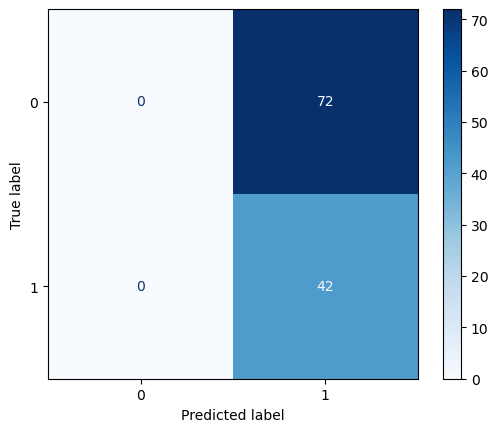

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, model_log.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


We can also visualize this confusion matrix using the **plot_confusion_matrix** of **scikit-learn** package,


NB. Instead, you can use one of the class methods from **ConfusionMatrixDisplay**:
- **ConfusionMatrixDisplay.from_estimator(estimator, X, y)**: This method plots the confusion matrix given an estimator (a fitted classifier) and some data
- **ConfusionMatrixDisplay.from_predictions(y_true, y_pred)** : This method plots the confusion matrix given the true and predicted labels

For more information check [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


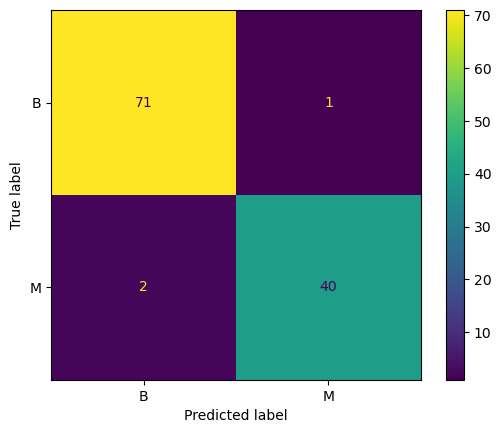

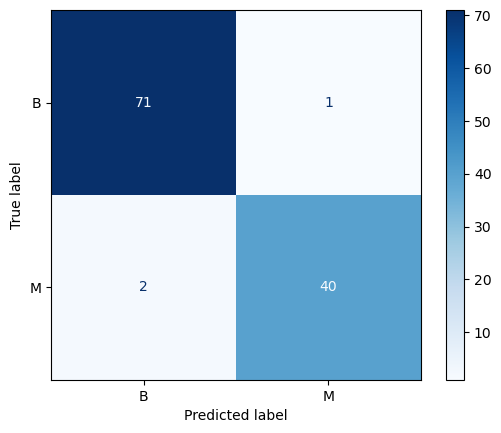

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix using the true and predicted labels
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model_log.classes_)
disp.plot(cmap="Blues")
plt.show()


We observe that the values of the confusion matrix are color-coded and a corresponding legend is provided.



Statistical machine learning algorithm, such as *LogisticRegression* work with *probability*. The predicted class labels using the trained model are assigned to a certain value based on a given threshold. For example, A threshold of 0.5 will cause that the label 1 is predicted when *P(y) > 0.5* or the label 0 when *P(y) <= 0.5*, where *P(y)* denotes the probability that is returned by the model.

These probailities can be returned explicitly using the **predict_proba** method of the trained model.



In [16]:
y_prob = model_log.predict_proba(X_test)
print(y_prob)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

/home/melynda/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


A way to quantify the performance of the trained classification model, regardless of the given threshold, is by using a *received operator characteristic (ROC) chart*, which plots the *true positive rate* (TPR) against the *false positive rate* (FPR):

$$ TPR = \frac{TP}{TP + FN},$$

$$ FPR = \frac{FP}{FP + TN}.$$

This can be plotted using the **roc_curve** of the **scikit-learn** package.

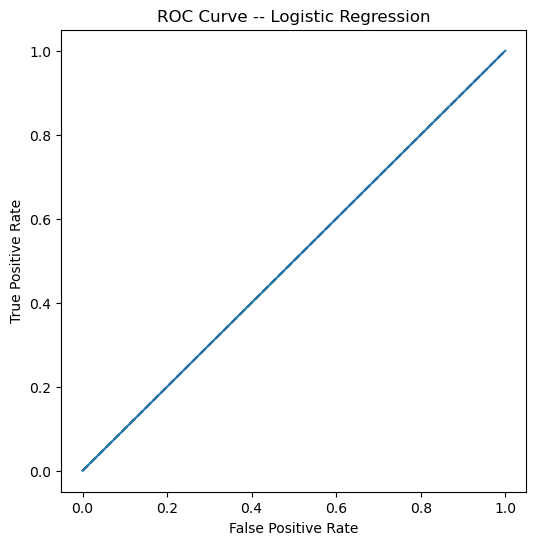

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Replace the y_test values into 1s and 0s using a dictionary
di = {"M": 1, "B": 0}
y_test2 = y_test.map(di)  # Ensure y_test is mapped to numerical values

# Extract probability of class 1 (Malignant) from predict_proba output
y_prob_class1 = y_prob[:, 1]  # Select only the second column (class 1 probabilities)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_prob_class1)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -- Logistic Regression')
plt.show()


The curve on the *ROC-curve* represent the TPR and the FPR of every possible chosen threshold for the trained model. The straight line is a reference and represent a model that guess the label classes randomly (we want to perform better than this). The more the ROC-cure is curved above this reference line, the better the model. For more info, please visit this [wikipedia page](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

A performance metric from the ROC-curve is to calculate the area under the curve (AUC), which is a number between 0 and 1. The higher this number, the better your trained model regardless of the chosen threshold. This can be calculated using the **roc_auc_score** method from **scikit-learn**. We shall use this method to get the AUC and save it in a table for later reference.

In [25]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Extract probability of class 1 (Malignant)
y_prob_class1 = y_prob[:, 1]  # Select only the second column (class 1 probabilities)

# Calculate AUC
auc = roc_auc_score(y_test2, y_prob_class1)

# Put it in a table for later reference
metrics = pd.DataFrame(index=["AUC"], columns=["LogisticRegression"])
metrics.iloc[0, 0] = auc

# Display the table
print(metrics)


    LogisticRegression
AUC                0.5


**- Question : **

Compare the AUC of both splits sets you obtained and drive your conclusion about the best splitting method

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Assuming X and y are pandas DataFrame and Series respectively

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_kfold = []

# Loop over the splits
for train_index, test_index in kf.split(X, y):
    # Use iloc to index by position rather than label
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Train the model on each fold
    model_log.fit(X_train_kf, y_train_kf)

    # Make predictions and calculate AUC
    y_prob_kf = model_log.predict_proba(X_test_kf)[:, 1]
    auc_kfold.append(roc_auc_score(y_test_kf, y_prob_kf))

# Compare the results
print(f"Average AUC for K-Fold Cross-Validation: {sum(auc_kfold)/len(auc_kfold)}")


Average AUC for K-Fold Cross-Validation: 0.9924284509815134


In [ ]:
suggests that your model is performing exceptionally well in distinguishing between the classes.

## Try other classification models

Now let us try a different algorithm other than *LogisticRegression*. There are many kinds of classification algorithm we could try, such as:

- *Support Vector Machine (SVM) algorithms*: Algorithms that define a *hyperplane* that separates classes.
- *Tree-based algorithms*: Algorithms that build a decision tree to reach a prediction
- *Ensemble algorithms*: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

Let us try a classification model using a Support Vector Machine algorithm. For this algorithm, we must provide a *kernel function*. It can be seen as another hyperparameter that you have to provide to the model before training. For more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/svm.html).

For simplicity let us train a linear SVM (with a linear kernel), plot the ROC-curve and store its AUC.

AUC for LinearSVC: 0.9927248677248677


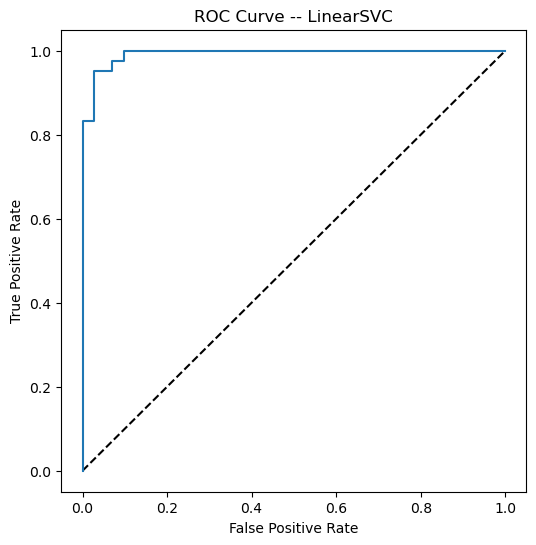

In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train a linear SVM model on the training set
model_svc = LinearSVC(random_state=42)
model_svc.fit(X_train, y_train)

# Make predictions using the model
y_prob_svc = model_svc.decision_function(X_test)  # For LinearSVC, use decision_function to get the decision values

# Calculate AUC
auc_svc = roc_auc_score(y_test2, y_prob_svc)
print(f"AUC for LinearSVC: {auc_svc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_prob_svc)

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classification
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -- LinearSVC')
plt.show()

In [28]:
# Concatinate AUCs
m = pd.Series([auc])
m.index = ["AUC"]
metrics = pd.concat([metrics, m.rename("LinearSVC")], axis=1)
metrics

,LogisticRegression,LinearSVC
AUC,0.5,0.5


As an alternative, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

It's easiest to see how this works with an example. Let us train a Decision Tree classification model using the Wisconsin Breast Cancer data. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train a Decision Tree Classifier model on the training set
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Visualize the model using a text representation of the tree
tree_rules = export_text(model_dt, feature_names=list(X_train.columns))
print(tree_rules)



|--- perimeter_worst <= 112.80
|   |--- concave points_worst <= 0.16
|   |   |--- area_mean <= 696.25
|   |   |   |--- smoothness_worst <= 0.18
|   |   |   |   |--- perimeter_worst <= 102.40
|   |   |   |   |   |--- area_se <= 47.03
|   |   |   |   |   |   |--- texture_worst <= 33.35
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |--- texture_worst >  33.35
|   |   |   |   |   |   |   |--- texture_mean <= 23.20
|   |   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |   |--- texture_mean >  23.20
|   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- area_se >  47.03
|   |   |   |   |   |   |--- concavity_se <= 0.02
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- concavity_se >  0.02
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |--- perimeter_worst >  102.40
|   |   |   |   |   |--- smoothness_worst <= 0.14
|   |   |   |   |   |   |--- perimeter_worst <= 102.70
|   |   |   |   |   |   |   |--- radius_m

Let us calculate the ROC-curve and store its AUC.

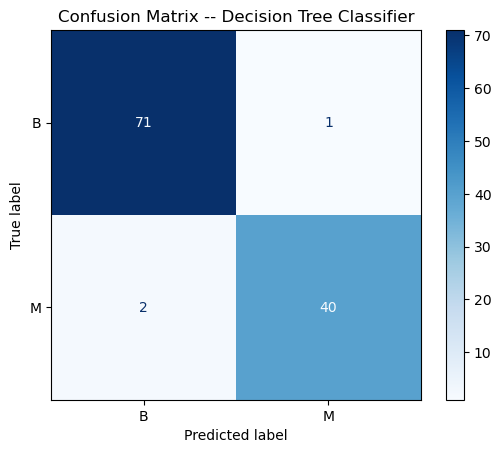

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix -- Decision Tree Classifier")
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_dt = model_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



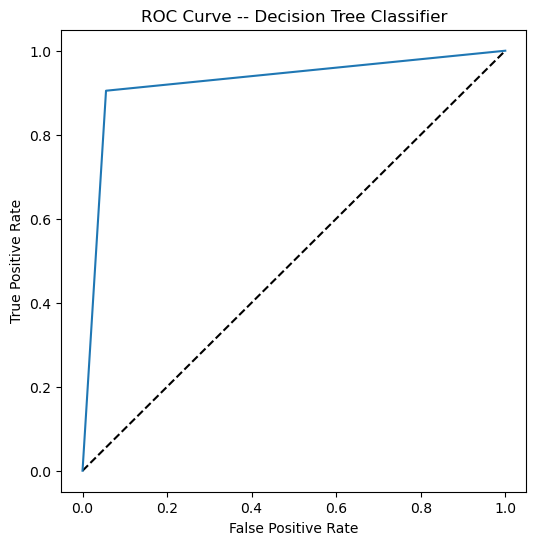

AUC: 0.9246031746031745


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert 'B' and 'M' labels to numeric values (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get predicted probabilities for class 1 (malignant) for ROC curve calculation
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob_dt)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -- Decision Tree Classifier')
plt.show()

# Calculate and store AUC
auc_dt = roc_auc_score(y_test_encoded, y_prob_dt)
print(f"AUC: {auc_dt}")


In [33]:
# Concatinate AUC
import pandas as pd

# Store AUC in a DataFrame for comparison
metrics = pd.DataFrame(index=["AUC"], columns=["DecisionTreeClassifier"])
metrics.iloc[0, 0] = auc_dt

# Display the table
print(metrics)


    DecisionTreeClassifier
AUC               0.924603


Finally, we will repeat the process with a model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

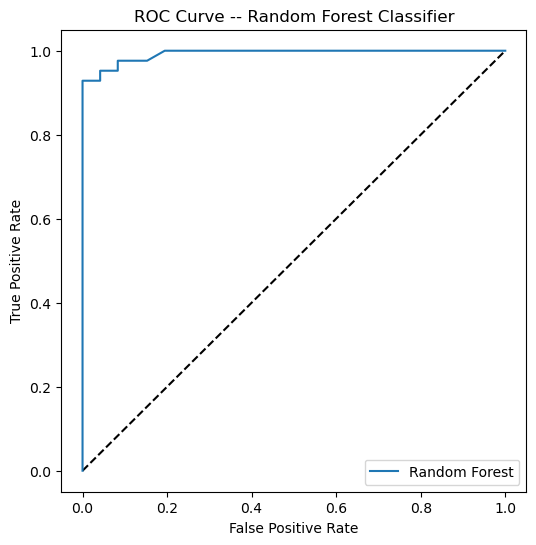

AUC for Random Forest: 0.9928902116402116


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder

# Provide number of estimators (hyperparameter)
n_estimators = 100  # You can change this value

# Train a RandomForestClassifier on the training set
model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
model_rf.fit(X_train, y_train)

# Convert 'B' and 'M' labels to numeric values (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Get predicted probabilities for class 1 (malignant) for ROC curve calculation
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.plot(fpr, tpr, label='Random Forest')  # ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -- Random Forest Classifier')
plt.legend()
plt.show()

# Calculate and store AUC
auc_rf = roc_auc_score(y_test_encoded, y_prob_rf)
print(f"AUC for Random Forest: {auc_rf}")


## Save your model and inference new cases

We have tried several machine learning models for our dataset.
Let us save the models, as a local file.

This can be done like this,

In [37]:
import joblib

# Save the model as a pickle file
filename = 'random_forest_model.pkl'
joblib.dump(model_rf, filename)
print("Model saved successfully!")


Model saved successfully!


Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.

The scenario might be that measurements of a cell nucleus of a new patient has been measured, and we want to predict whether the tumor of the patient is benign or malignant.

In [40]:
import joblib
import numpy as np

# ========== Load the trained model ==========
filename = 'random_forest_model.pkl'

try:
    loaded_model = joblib.load(filename)  # Load the saved model
    print("✅ Model loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: Model file '{filename}' not found.")
    exit()

# ========== Create new sample data ==========
# Example: Replace with actual cell nucleus measurement data

X_new = np.array([[10.2, 15.4, 85.3, 520.5, 0.102, 0.136, 0.098, 0.071, 0.178, 0.065, 
                   12.3, 18.2, 90.1, 600.4, 0.110, 0.150, 0.105, 0.080, 0.190, 0.070,
                   14.1, 20.5, 95.6, 650.2, 0.115, 0.160, 0.108, 0.085, 0.200, 0.075]])  

# Check input shape
if X_new.shape[1] != loaded_model.n_features_in_:
    print(f"❌ Error: Model expects {loaded_model.n_features_in_} features, but received {X_new.shape[1]}.")
    exit()

print(f"✅ Input shape is correct: {X_new.shape}")

# ========== Use the model to predict tumor type ==========
try:
    result = loaded_model.predict(X_new)
    print(f"✅ Prediction successful! Tumor type: {result[0]}")
except Exception as e:
    print(f"❌ Prediction error: {e}")


✅ Model loaded successfully!
✅ Input shape is correct: (1, 30)
✅ Prediction successful! Tumor type: B


/home/melynda/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Further Readings

Sources:
- To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).
- To learn more about machine learning basics on other datasets, see the [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics).